In [1]:
import numpy as np
import cv2 as cv
import matplotlib.pylab as plt

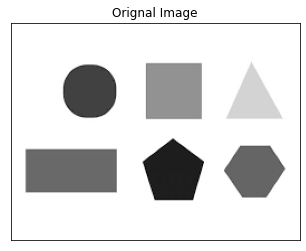

In [2]:
orignalImage=cv.imread("Car.png", 0)
plt.xticks([])
plt.yticks([])
plt.title("Orignal Image")
plt.imshow(orignalImage, cmap='gray')

In [3]:
Threshold=orignalImage.mean()
while True:
    foreground =(orignalImage > Threshold) * orignalImage
    background =(orignalImage <= Threshold) * orignalImage
    foregroundMean=foreground.mean()
    backgroundMean=background.mean()
    NewThreshold=foregroundMean+backgroundMean/2
    Diff=NewThreshold-Threshold
    if Diff>1e-4:
        Threshold=NewThreshold
    else:
        break


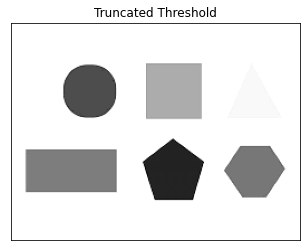

In [4]:
row, columns=orignalImage.shape
Truncate=np.zeros((row, columns), np.uint8)
for i in range(orignalImage.shape[0]):
    for j in range(orignalImage.shape[1]):
        if orignalImage[i,j] > Threshold:
            Truncate[i,j]=Threshold
        else:
            Truncate[i,j]=orignalImage[i,j]
plt.xticks([])
plt.yticks([])
plt.title("Truncated Threshold")
plt.imshow(Truncate, cmap='gray')

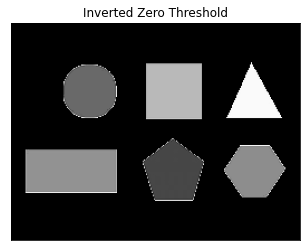

In [5]:
ZeroInverted=np.zeros((row, columns), np.uint8)
for i in range(orignalImage.shape[0]):
    for j in range(orignalImage.shape[1]):
        if orignalImage[i,j] > Threshold:
            ZeroInverted[i,j]=0
        else:
            ZeroInverted[i,j]=orignalImage[i,j]
plt.xticks([])
plt.yticks([])
plt.title("Inverted Zero Threshold")
plt.imshow(ZeroInverted, cmap='gray')

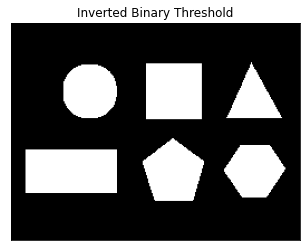

In [6]:
BinaryInverted=np.zeros((row, columns), np.uint8)
for i in range(orignalImage.shape[0]):
    for j in range(orignalImage.shape[1]):
        if orignalImage[i,j] > Threshold:
            BinaryInverted[i,j]=0
        else:
            BinaryInverted[i,j]=255
plt.xticks([])
plt.yticks([])
plt.title("Inverted Binary Threshold")
plt.imshow(BinaryInverted, cmap='gray')